In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Definicje parametrów używanych w symulacji
g = 9.81
R = 1.0
m = 1.0

# Funkcja obliczająca pochodne
def pochodne(t, s):
    s0, s1 = s
    ds0dt = s1
    ds1dt = -g / R * np.sin(s0)
    return np.array([ds0dt, ds1dt])

# Implementacja metody RK4
def rk4_vec(f, t, y0):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        h = t[i + 1] - t[i]
        k1 = h * f(t[i], y[i])
        k2 = h * f(t[i] + 0.5 * h, y[i] + 0.5 * k1)
        k3 = h * f(t[i] + 0.5 * h, y[i] + 0.5 * k2)
        k4 = h * f(t[i] + h, y[i] + k3)
        y[i + 1] = y[i] + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return y

# Rozwiązanie analityczne dla małych wychyleń
def rozw_analityczne(t, s0_initial):
    return s0_initial * np.cos(np.sqrt(g / R) * t)


# Warunki początkowe
s0_initial = 4 * np.pi / 180  # Przykładowa wartość początkowa kąta
s1_initial = 0.0  # Przykładowa wartość początkowa prędkości kątowej
initial_conditions = np.array([s0_initial, s1_initial])

# Czas symulacji
t_start = 0
t_end = 10
dt = 0.01
t = np.arange(t_start, t_end, dt)

# Rozwiązanie układu równań różniczkowych metodą RK4
solution = rk4_vec(pochodne, t, initial_conditions)

# Wyświetlenie wyników
print("Czas (s)\t Kąt (rad)\t Prędkość kątowa (rad/s)")
#for i in range(len(t)):
#    print(f"{t[i]}\t\t {solution[i,0]}\t\t {solution[i,1]}")

    

Czas (s)	 Kąt (rad)	 Prędkość kątowa (rad/s)


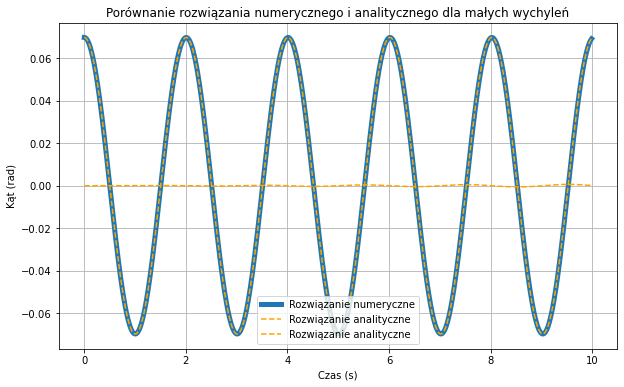

In [12]:
# Czas symulacji
dt = 0.01
nt = 1000
t = np.linspace(0, dt * (nt - 1), nt)

# Rozwiązanie numeryczne układu równań różniczkowych metodą RK4
solution_numeric = rk4_vec(pochodne, t, initial_conditions)

# Rozwiązanie analityczne
solution_analytic = rozw_analityczne(t, s0_initial)

# Wykres porównawczy
plt.figure(figsize=(10, 6))
plt.plot(t, solution_numeric[:, 0], label='Rozwiązanie numeryczne', linewidth = 5)
plt.plot(t, solution_analytic, label='Rozwiązanie analityczne', linestyle='--', color = 'orange')
plt.plot(t, solution_analytic - solution_numeric[:, 0], label='Rozwiązanie analityczne', linestyle='--', color = 'orange')
plt.title('Porównanie rozwiązania numerycznego i analitycznego dla małych wychyleń')
plt.xlabel('Czas (s)')
plt.ylabel('Kąt (rad)')
plt.legend()
plt.grid(True)
plt.show()

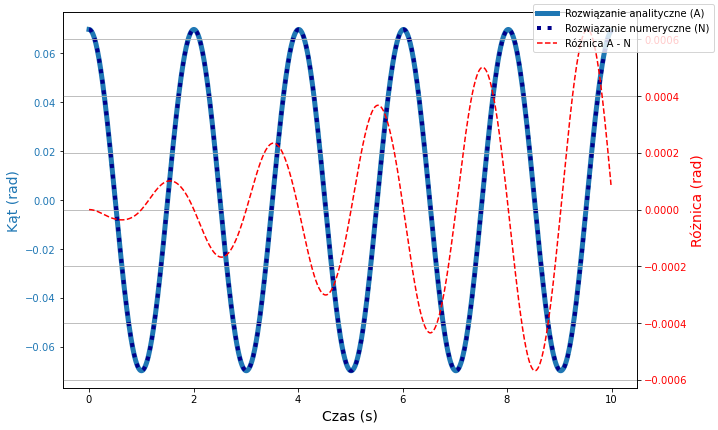

In [40]:
# Wykres porównawczy
fig, ax1 = plt.subplots(figsize=(10, 6))

# Pierwszy wykres na lewej osi y
color = 'tab:blue'
ax1.set_xlabel('Czas (s)', fontsize = 14)
ax1.set_ylabel('Kąt (rad)', color=color, fontsize = 14)
ax1.plot(t, solution_analytic, label='Rozwiązanie analityczne (A)', linewidth=5, color=color)
ax1.plot(t, solution_numeric[:, 0], label='Rozwiązanie numeryczne (N)', color='darkblue', linestyle = 'dotted', linewidth=4)
ax1.tick_params(axis='y', labelcolor=color)

# Drugi wykres na prawej osi y
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Różnica (rad)', color='r', fontsize = 14)
ax2.plot(t, solution_analytic - solution_numeric[:, 0], label='Różnica A - N', linestyle='--', color='r')
ax2.tick_params(axis='y', labelcolor='r')

#fig.suptitle('Porównanie rozwiązania numerycznego i analitycznego dla małych wychyleń')
fig.tight_layout()
fig.legend(loc='upper right')
plt.grid(True)
plt.savefig('1_Kat_czas')
plt.show()

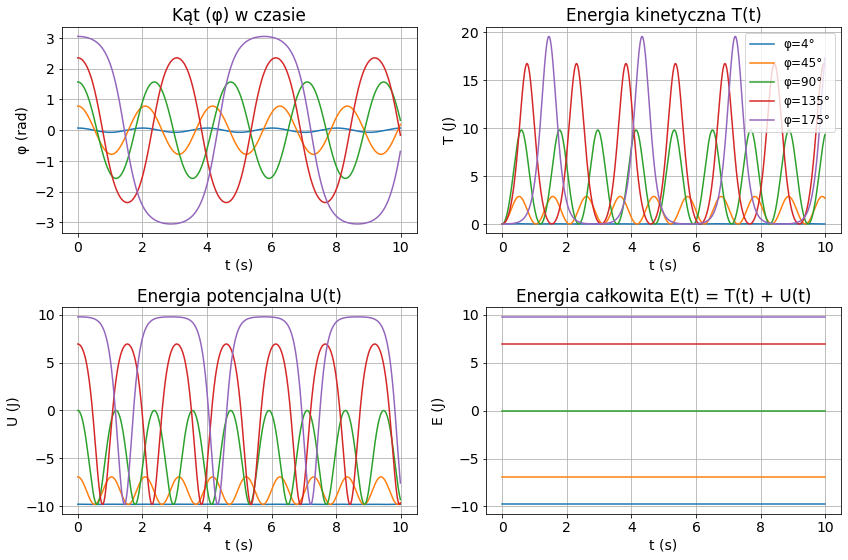

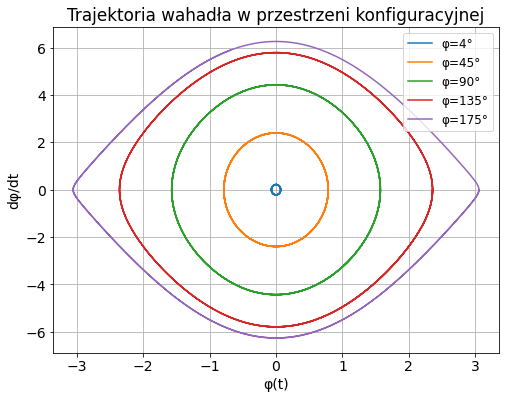

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update({'font.size': 14})

# Definicje parametrów używanych w symulacji
g = 9.81
R = 1.0
m = 1.0

# Funkcja obliczająca pochodne
def pochodne(t, s):
    s0, s1 = s
    ds0dt = s1
    ds1dt = -g / R * np.sin(s0)  
    return np.array([ds0dt, ds1dt])

# Implementacja metody RK4
def rk4_vec(f, t, y0):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        h = t[i + 1] - t[i]
        k1 = h * f(t[i], y[i])
        k2 = h * f(t[i] + 0.5 * h, y[i] + 0.5 * k1)
        k3 = h * f(t[i] + 0.5 * h, y[i] + 0.5 * k2)
        k4 = h * f(t[i] + h, y[i] + k3)
        y[i + 1] = y[i] + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return y

# Rozwiązanie analityczne dla małych wychyleń
def rozw_analityczne(t, s0_initial):
    return s0_initial * np.cos(np.sqrt(g / R) * t)

# Obliczenie energii kinetycznej
def energia_kinetyczna(s):
    return 0.5 * m * R**2 * s[:, 1]**2

# Obliczenie energii potencjalnej
def energia_potencjalna(s):
    return  - m * g * R *  np.cos(s[:, 0])

# Obliczenie energii całkowitej
def energia_calkowita(T, U):
    return T + U 



# Warunki początkowe
initial_phi = [4, 45, 90, 135, 175]
initial_conditions_list = [(np.radians(angle), 0.0) for angle in initial_phi]

# Czas symulacji
dt = 0.01
nt = 1000
t = np.linspace(0, dt * (nt - 1), nt)

# Rozwiązania numeryczne dla różnych warunków początkowych
solutions = []
for initial_conditions in initial_conditions_list:
    solution_numeric = rk4_vec(pochodne, t, initial_conditions)
    solutions.append(solution_numeric)

# Wykresy dla różnych warunków początkowych
plt.figure(figsize=(12, 8))

# Wykresy φ(t)
plt.subplot(2, 2, 1)
for solution, phi in zip(solutions, initial_phi):
    plt.plot(t, solution[:, 0])
plt.title('Kąt (φ) w czasie')
plt.xlabel('t (s)')
plt.ylabel('φ (rad)')
plt.grid(True)

# Wykresy energii kinetycznej T(t)
plt.subplot(2, 2, 2)
for solution, phi in zip(solutions, initial_phi):
    plt.plot(t, energia_kinetyczna(solution), label=f'φ={phi}°')
plt.title('Energia kinetyczna T(t)')
plt.xlabel('t (s)')
plt.legend(fontsize = 12)
plt.ylabel('T (J)')
plt.grid(True)

# Wykresy energii potencjalnej U(t)
plt.subplot(2, 2, 3)
for solution in solutions:
    plt.plot(t, energia_potencjalna(solution))
plt.title('Energia potencjalna U(t)')
plt.xlabel('t (s)')
plt.ylabel('U (J)')
plt.grid(True)

# Wykresy energii całkowitej E(t)
plt.subplot(2, 2, 4)
for solution, phi in zip(solutions, initial_phi):
    T = energia_kinetyczna(solution)
    U = energia_potencjalna(solution)
    E = energia_calkowita(T, U)
    plt.plot(t, E)
plt.title('Energia całkowita E(t) = T(t) + U(t)')
plt.xlabel('t (s)')
plt.ylabel('E (J)')
plt.grid(True)
plt.tight_layout()
plt.savefig('Energie')
plt.show()

# Wykres trajektorii wahadła w przestrzeni konfiguracyjnej
plt.figure(figsize=(8, 6))
for solution, phi in zip(solutions, initial_phi):
     plt.plot(solution[:, 0], solution[:, 1], label = f'φ={phi}°')
plt.title('Trajektoria wahadła w przestrzeni konfiguracyjnej')
plt.xlabel('φ(t)')
plt.ylabel('dφ/dt')
plt.grid(True)
plt.legend(fontsize = 12)
plt.savefig('trajektoria')
plt.show()


C:\Users\Werka\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Werka\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


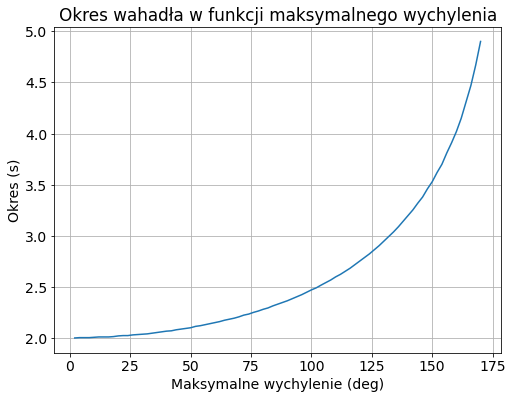

2.0060666807106475
11.841717523440032


In [84]:
# Obliczanie okresu wahadła
def okres_wahadla(t, phi):
    # Znajdź wszystkie punkty przecięcia z osią x (maksymalne wychylenia)
    indeksy_max = np.where(np.diff(np.sign(np.diff(phi))) < 0)[0]
    # Oblicz odległości między kolejnymi punktami przecięcia
    odleglosci = np.diff(t[indeksy_max])
    # Średnia z odległości między punktami przecięcia to okres wahadła
    okresy = np.mean(odleglosci)
    return okresy

# Wykres okresu wahadła w funkcji maksymalnego wychylenia
maksymalne_wychylenia = np.radians(np.linspace(0, 180, 91))
okresy = []

for initial_phi in maksymalne_wychylenia:
    initial_conditions = (initial_phi, 0.0)
    solution_numeric = rk4_vec(pochodne, t, initial_conditions)
    okres = okres_wahadla(t, solution_numeric[:, 0])
    okresy.append(okres)

plt.figure(figsize=(8, 6))
plt.plot(np.degrees(maksymalne_wychylenia), okresy)
plt.title('Okres wahadła w funkcji maksymalnego wychylenia')
plt.xlabel('Maksymalne wychylenie (deg)')
plt.ylabel('Okres (s)')
plt.grid(True)
plt.savefig('XXX_maks_okres')
plt.show()
print(2*np.pi*np.sqrt(R/g))
print(g*(1/2 - np.cos(np.radians(135))))


In [88]:
print(g*(np.cos(np.radians(90))))
print(g*(np.cos(np.radians(4))))
print(g*(np.cos(np.radians(45))))
print(g*(np.cos(np.radians(135))))
print(g*(np.cos(np.radians(175))))

6.006892549817768e-16
9.786103333048876
6.9367175234400325
-6.936717523440031
-9.772669988280024
